# Sentiment analysis of app reviews
Following this [tutorial](https://www.youtube.com/watch?v=-CAC4wK9Ey0) part 1 create custom dataset 

In [1]:
# Install package for scrapping from google play store 
!pip install -qq google-play-scraper

In [2]:
# Imports
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)


## Get info of apps

In [3]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
    ]

In [4]:
app_infos = []

for ap in tqdm(app_packages):
    try:
        info = app(ap, lang='en', country = 'us')
        del info['comments']
        app_infos.append(info)
    except:
        print(f"{ap} not found")

100%|██████████| 15/15 [00:04<00:00,  3.38it/s]


In [8]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [10]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "<b>\ud83c\udfc6 Editor's Choice by Google</b>\r\n\r\nAny.do is a To Do List, Calendar, Planner, Tasks & Reminders App That Helps Over 25M People Stay Organized and Get More Done.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY, WSJ).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\n\ud83d\udcc5 Organize Your Tasks & To-Do List in Seconds\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar v

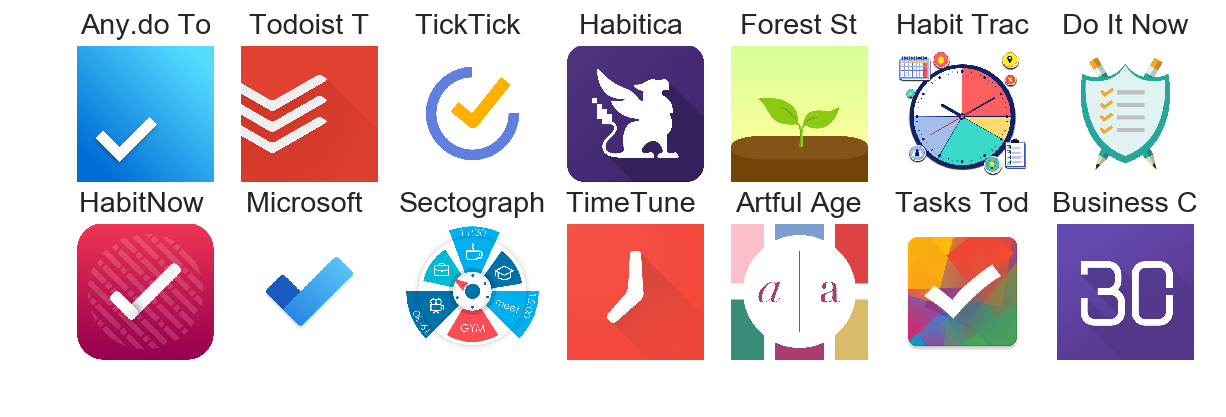

In [18]:
def format_title(title):
    title = title.replace(':','')
    title = title.replace('-','')
    return title



fig, axs = plt.subplots(2, len(app_infos)//2, figsize=(10,3))

for i, ax in enumerate(axs.flatten()):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title'][:10]))
    ax.axis('off')

In [22]:
app_info_df = pd.DataFrame(app_infos)
app_info_df.head(2)

,adSupported,androidVersion,androidVersionText,appId,containsAds,contentRating,contentRatingDescription,currency,description,descriptionHTML,...,screenshots,size,summary,summaryHTML,title,updated,url,version,video,videoImage
0,None,Varies,Varies with device,com.anydo,False,Everyone,None,USD,<b>🏆 Editor's Choice by Google</b>\r\n\r\nAny....,<b>🏆 Editor&#39;s Choice by Google</b><br><br>...,...,[https://lh3.googleusercontent.com/DKoi-PetUjx...,Varies with device,To-do list ✅ Task Manager 📝 Reminders 🔔 Che...,To-do list ✅ Task Manager 📝 Reminders 🔔 Che...,"Any.do: To do list, Calendar, Planner & Reminders",1601878042,https://play.google.com/store/apps/details?id=...,Varies with device,https://www.youtube.com/embed/2nkllLD0x6o?ps=p...,https://i.ytimg.com/vi/2nkllLD0x6o/hqdefault.jpg
1,None,Varies,Varies with device,com.todoist,False,Everyone,None,USD,"🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,...,[https://lh3.googleusercontent.com/cealfl906mH...,Varies with device,"""The best to-do list"" — The Verge. Tasks ✅ Rem...",&quot;The best to-do list&quot; — The Verge. T...,"Todoist: To-Do List, Tasks & Reminders",1602678523,https://play.google.com/store/apps/details?id=...,Varies with device,None,None


In [21]:
app_info_df.to_csv('apps.csv', index=None, header=True)

## Get app_reviews

In [32]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in range(1,6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,
                count= 200 if score == 3 else 100,
                filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appID'] = ap
            app_reviews.append(rvs)



100%|██████████| 15/15 [01:49<00:00,  7.31s/it]


In [33]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,{'reviewId': 'gp:AOqpTOHwUzr9PMxzLMaGMi2rGzNlA...,{'reviewId': 'gp:AOqpTOH9y0mrXUuqulfB_d48QIXYJ...,{'reviewId': 'gp:AOqpTOHB6-9UnF_GWUDr3szAVvXyv...,{'reviewId': 'gp:AOqpTOEP-X3mbO7FINTNm2xh0kUoM...,{'reviewId': 'gp:AOqpTOFZRTvOOvkhQFYxFpATV-0sW...,{'reviewId': 'gp:AOqpTOF20Qx0SGYiFEhKMSCWsc1Qr...,{'reviewId': 'gp:AOqpTOFUz9gdtUGHQgnEqKlp-jzSu...,{'reviewId': 'gp:AOqpTOFtaevt1hmnXk0aPdFseRhFS...,{'reviewId': 'gp:AOqpTOGiw71s_vPVDioXw7Rqv2oHz...,{'reviewId': 'gp:AOqpTOFXbJGy8gYsM8t_77DiyuuwV...,...,None,None,None,None,None,None,None,None,None,None
1,{'reviewId': 'gp:AOqpTOG9cqNtW6wDlVZOu-v0fFtyK...,{'reviewId': 'gp:AOqpTOG7O0QHPF-ALRwVW6FMGeKf5...,{'reviewId': 'gp:AOqpTOHQ_paQ_ffWsMqGOWmMsPxs-...,{'reviewId': 'gp:AOqpTOEi68n5Nhll2XbpRcoV6IIkr...,{'reviewId': 'gp:AOqpTOGbiMG5WNCrGuTd0nmHg0Tok...,{'reviewId': 'gp:AOqpTOELOICKPjyvmSySLflfOlkd0...,{'reviewId': 'gp:AOqpTOF9yXFNFzssxE_a4QF9W4ECF...,{'reviewId': 'gp:AOqpTOHnLeO0PPj1jtiWlfKaIADWg...,{'reviewId': 'gp:AOqpTOHlSaprmrINSj7IOMfYRbGyH...,{'reviewId': 'gp:AOqpTOEP-X3mbO7FINTNm2xh0kUoM...,...,None,None,None,None,None,None,None,None,None,None


In [34]:
app_reviews_df.to_csv('reviews.csv', index=None, header=True)